In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [29]:
data = pd.read_csv("C:/Users/user/Documents/GitHub/JBIG-OT-Kmeans/test/test.csv",encoding ='euc-kr')

In [31]:
test = data
test

,name,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,박준형,5,4,8,8,3,8,3,2,3,4,1,9
1,최수민,3,3,2,7,3,6,3,3,3,4,4,2
2,조민준,9,3,10,8,3,10,1,10,3,6,1,10
3,박지은,2,8,1,10,8,2,2,3,8,6,5,2
4,정성문,3,7,9,9,9,3,9,9,3,2,2,8
5,신호연,5,7,8,8,5,8,5,2,4,5,1,2
6,최민아,3,8,2,8,2,5,7,1,2,8,3,10
7,이봉수,6,6,7,6,7,6,6,7,5,6,6,6
8,노건우,4,6,7,9,5,10,6,7,5,2,8,4
9,장수빈,7,3,8,4,6,8,8,3,5,10,10,7


In [32]:
test = test.drop('name', axis =1)

In [33]:
kmeans = KMeans(n_clusters=3, random_state=2,init='k-means++',max_iter=1000)

In [34]:
test_cl = kmeans.fit(test)

In [35]:
result = test.copy()
result["cluster"] = test_cl.labels_
result

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,cluster
0,5,4,8,8,3,8,3,2,3,4,1,9,0
1,3,3,2,7,3,6,3,3,3,4,4,2,0
2,9,3,10,8,3,10,1,10,3,6,1,10,1
3,2,8,1,10,8,2,2,3,8,6,5,2,0
4,3,7,9,9,9,3,9,9,3,2,2,8,1
5,5,7,8,8,5,8,5,2,4,5,1,2,0
6,3,8,2,8,2,5,7,1,2,8,3,10,0
7,6,6,7,6,7,6,6,7,5,6,6,6,2
8,4,6,7,9,5,10,6,7,5,2,8,4,2
9,7,3,8,4,6,8,8,3,5,10,10,7,2


In [36]:
pca = PCA(n_components=5)

In [37]:
pca_test = pca.fit_transform(test)

In [38]:
pcaDf = pd.DataFrame(data=pca_test, columns = ['comp1', 'comp2','comp3','comp4','comp5'])
pcaDf['cluster'] = result['cluster']

<AxesSubplot:xlabel='comp1', ylabel='comp2'>

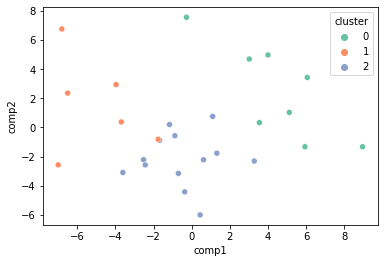

In [39]:
sns.scatterplot(x="comp1", y="comp2", hue="cluster", data=pcaDf, palette="Set2")

In [40]:
data.loc[result['cluster'] == 1]

,name,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
2,조민준,9,3,10,8,3,10,1,10,3,6,1,10
4,정성문,3,7,9,9,9,3,9,9,3,2,2,8
17,안소현,8,2,9,9,9,7,9,9,5,3,7,9
19,박준수,7,2,8,1,7,2,9,7,4,6,3,9
20,정일호,6,3,3,10,6,7,8,9,3,5,6,8
24,김유경,7,5,9,7,4,3,2,8,4,7,4,9


In [41]:
data.loc[result['cluster'] == 2]

,name,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
7,이봉수,6,6,7,6,7,6,6,7,5,6,6,6
8,노건우,4,6,7,9,5,10,6,7,5,2,8,4
9,장수빈,7,3,8,4,6,8,8,3,5,10,10,7
10,김지수,6,5,5,6,6,5,5,9,3,6,5,5
11,황승규,3,3,8,7,8,7,3,8,3,9,9,4
13,배재은,7,4,7,8,4,6,6,7,4,3,10,7
14,최성렬,8,8,8,8,3,4,7,4,5,6,5,2
15,임하은,8,8,9,8,9,9,4,8,7,9,8,8
18,김건우,4,8,7,8,6,4,6,7,5,7,10,7
21,김수연,7,7,7,5,4,8,3,4,3,1,10,8


In [42]:
data.loc[result['cluster'] == 0]

,name,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,박준형,5,4,8,8,3,8,3,2,3,4,1,9
1,최수민,3,3,2,7,3,6,3,3,3,4,4,2
3,박지은,2,8,1,10,8,2,2,3,8,6,5,2
5,신호연,5,7,8,8,5,8,5,2,4,5,1,2
6,최민아,3,8,2,8,2,5,7,1,2,8,3,10
12,황산하,3,5,3,10,8,8,3,4,7,2,6,2
16,권주원,3,5,3,8,3,8,3,8,4,6,6,3
25,오선준,3,8,2,7,8,9,5,2,3,9,5,6
